In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib inline

from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [39]:
df = pd.read_csv('kadikoy.csv')

df.head()


,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [40]:
# Deleting columns
# Delete the "Date" column from the dataframe
# Delete the "Neighborhood" column from the dataframe
# Delete the "Id" column from the dataframe

df = df.drop("Date", axis=1)
df = df.drop("Neighborhood", axis=1)

df.head()

,Id,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [41]:
print ('Initial shape of the kadikoy HouseData is', df.shape)

df.dtypes

Initial shape of the kadikoy HouseData is (949, 12)


Id                 int64
Price            float64
NetArea          float64
GrossArea        float64
NumberOfRoom     float64
AgeOfBuilding    float64
LocatedFloor     float64
TotalFloor       float64
Bathroom         float64
Balcony          float64
Furniture        float64
RentIncome       float64
dtype: object

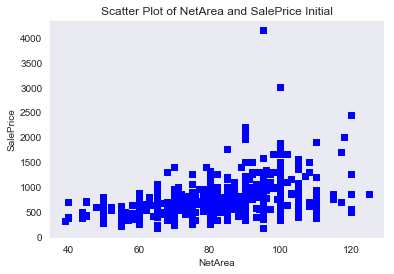

In [42]:
# Looking for outliers
plt.scatter(x = df.NetArea, y = df.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

In [43]:
# Remove these outliers to make a good prediction later on
df = df.drop(df[(df['NetArea']>110)].index)
df = df.drop(df[(df['Price']>1000)].index)

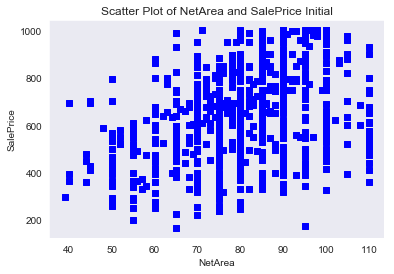

In [44]:
# Display the graph after outliers have been removed
plt.scatter(x = df.NetArea, y = df.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

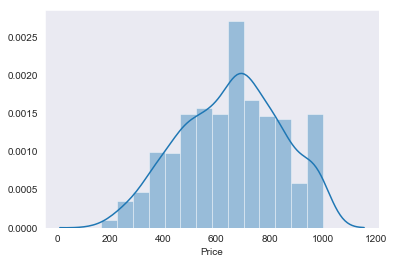

In [45]:
# Check the distribution of label values (SalePrice)
sns.distplot(df['Price'])


In [46]:
# Skewness metric
df['Price'].skew()

-0.1480133271404449

In [47]:
# normalized_saleprice = np.log(df['Price'])
# print('Check skewness:', normalized_saleprice.skew())

In [48]:
# sns.distplot(normalized_saleprice)

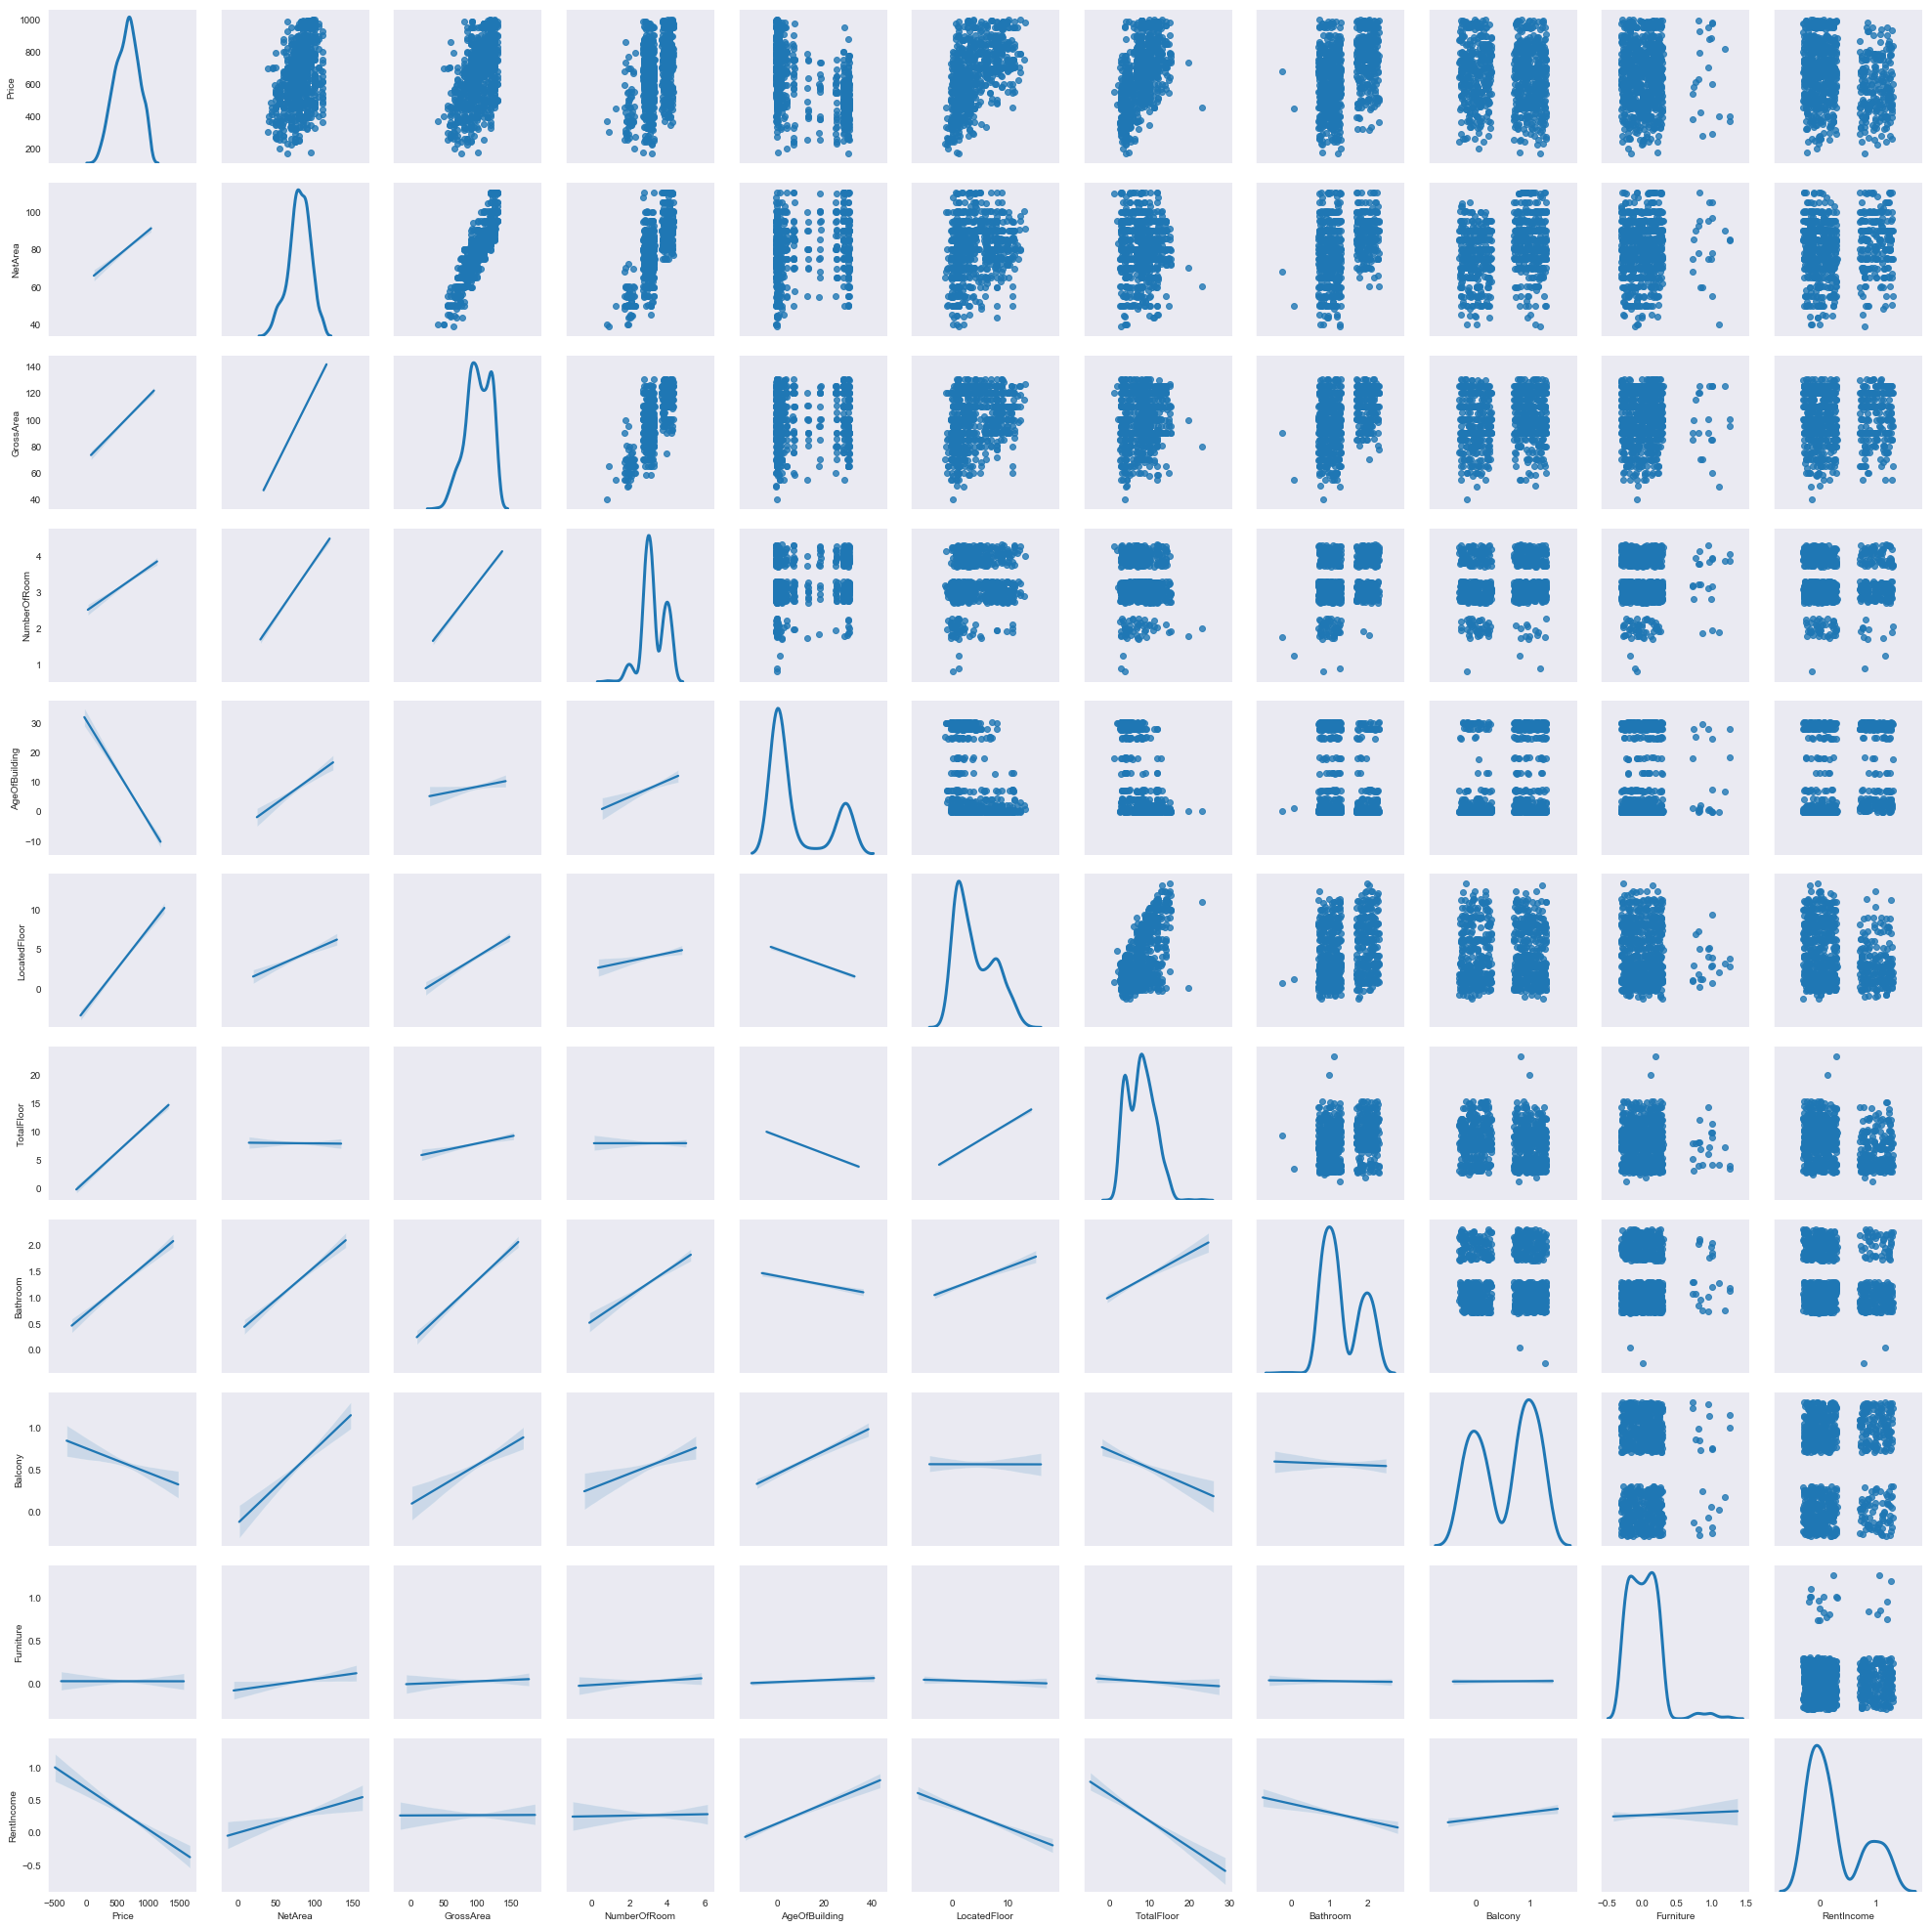

In [49]:
df_explore = df.loc[:, ['Price','NetArea','GrossArea','NumberOfRoom', 'AgeOfBuilding', 'LocatedFloor', 'TotalFloor',"Bathroom", "Balcony", "Furniture", "RentIncome"]]

# I don't know which plot styles are nicest, so I'll use one from the course notes
sns.set_style('dark')

# We will add jitter to all variables, then do a PairGrid.
df_jittered = df_explore.loc[:, 'Price':'RentIncome'].dropna()

# Adding random noise.
jitter = pd.DataFrame(
np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)


# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Here is where we declare we are making a scatter plot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.8)
# Fit a line showing linear relationship between varaibles.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give info about the univariate distribution of each variable.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                  Price   NetArea  GrossArea  NumberOfRoom  AgeOfBuilding  \
Price          1.000000  0.366551   0.492513      0.391849      -0.522868   
NetArea        0.366551  1.000000   0.894966      0.748044       0.210921   
GrossArea      0.492513  0.894966   1.000000      0.750460       0.060206   
NumberOfRoom   0.391849  0.748044   0.750460      1.000000       0.135322   
AgeOfBuilding -0.522868  0.210921   0.060206      0.135322       1.000000   
LocatedFloor   0.541850  0.176317   0.273962      0.096090      -0.376491   
TotalFloor     0.565014 -0.004067   0.136771      0.008755      -0.587975   
Bathroom       0.387170  0.373601   0.450749      0.343224      -0.216494   
Balcony       -0.104652  0.258436   0.186910      0.119635       0.329842   
Furniture      0.011633  0.009066  -0.037391      0.012112       0.034095   
RentIncome    -0.261030  0.115212   0.005673      0.019444       0.418554   

               LocatedFloor  TotalFloor  Bathroom   Balcony  Furniture  \
P

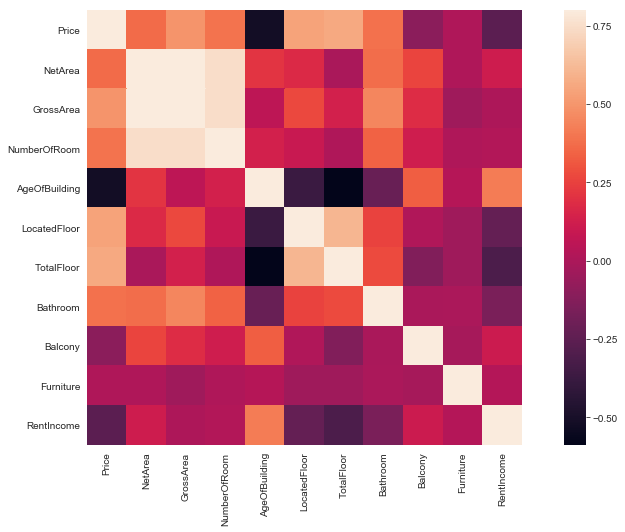

In [50]:
# Next, we'll make a correlation matrix.
corrmat = df_explore.loc[:, 'Price':'RentIncome'].corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15,8))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


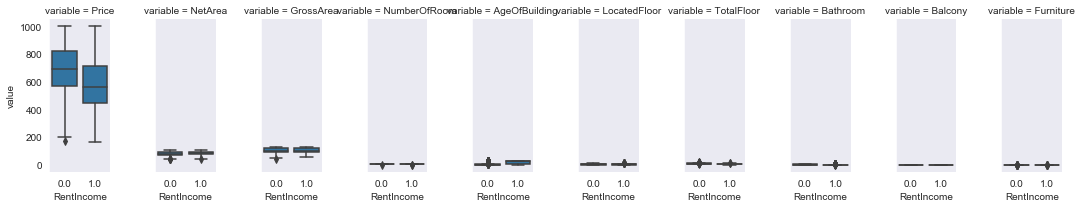

            Price                                                       \
            count        mean         std    min     25%    50%    75%   
RentIncome                                                               
0.0         596.0  686.557047  182.678369  175.0  570.00  695.0  825.0   
1.0         228.0  576.710526  180.042957  167.0  448.75  560.0  710.0   

                   NetArea             ... Balcony      Furniture            \
               max   count       mean  ...     75%  max     count      mean   
RentIncome                             ...                                    
0.0         1000.0   596.0  79.550336  ...     1.0  1.0     596.0  0.025168   
1.0         1000.0   228.0  83.171053  ...     1.0  1.0     228.0  0.035088   

                                               
                 std  min  25%  50%  75%  max  
RentIncome                                     
0.0         0.156766  0.0  0.0  0.0  0.0  1.0  
1.0         0.184406  0.0  0.0  0.0  0.0 

In [52]:
# We only have one categorical variable, and that is waterfront. We will make a boxplot for each continuous variable.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_explore
df_long = pd.melt(df_long, id_vars=['RentIncome'])

g = sns.FacetGrid(df_long, col="variable", size=3, aspect=.5)
g = g.map(sns.boxplot, "RentIncome", "value")
plt.show()

# Descriptive statistics by group.
print(df_explore.groupby('RentIncome').describe())

# Test whether group differences are significant.
for col in df_explore.loc[:,'Price':'RentIncome'].columns:
    print(col)
    print(stats.ttest_ind(
        df_explore[df_explore['RentIncome'] == 0][col].dropna(),
        df_explore[df_explore['RentIncome'] == 1][col].dropna()
    ))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


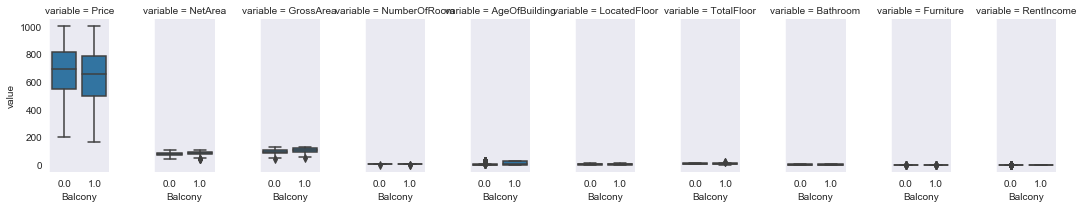

         Price                                                                \
         count        mean         std    min     25%    50%     75%     max   
Balcony                                                                        
0.0      362.0  678.419890  188.034919  199.0  546.25  692.5  813.75  1000.0   
1.0      462.0  638.722944  186.998188  167.0  495.00  652.5  785.00  1000.0   

        NetArea             ... Furniture      RentIncome                      \
          count       mean  ...       75%  max      count      mean       std   
Balcony                     ...                                                 
0.0       362.0  76.447514  ...       0.0  1.0      362.0  0.220994  0.415491   
1.0       462.0  83.768398  ...       0.0  1.0      462.0  0.320346  0.467115   

                                  
         min  25%  50%  75%  max  
Balcony                           
0.0      0.0  0.0  0.0  0.0  1.0  
1.0      0.0  0.0  0.0  1.0  1.0  

[2 rows x 80 colu

In [53]:
# We only have one categorical variable, and that is waterfront. We will make a boxplot for each continuous variable.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_explore
df_long = pd.melt(df_long, id_vars=['Balcony'])

g = sns.FacetGrid(df_long, col="variable", size=3, aspect=.5)
g = g.map(sns.boxplot, "Balcony", "value")
plt.show()

# Descriptive statistics by group.
print(df_explore.groupby('Balcony').describe())

# Test whether group differences are significant.
for col in df_explore.loc[:,'Price':'RentIncome'].columns:
    print(col)
    print(stats.ttest_ind(
        df_explore[df_explore['Balcony'] == 0][col].dropna(),
        df_explore[df_explore['Balcony'] == 1][col].dropna()
    ))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


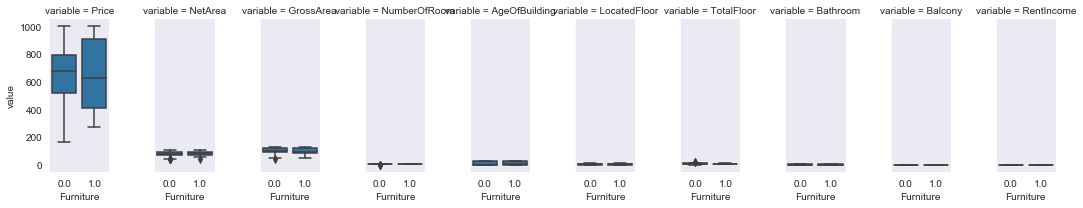

           Price                                                              \
           count        mean         std    min    25%    50%    75%     max   
Furniture                                                                      
0.0        801.0  655.791511  186.396386  167.0  515.0  675.0  790.0  1000.0   
1.0         23.0  669.086957  252.741498  275.0  409.5  630.0  907.5  1000.0   

          NetArea             ... Balcony      RentIncome                      \
            count       mean  ...     75%  max      count      mean       std   
Furniture                     ...                                               
0.0         801.0  80.530587  ...     1.0  1.0      801.0  0.274657  0.446620   
1.0          23.0  81.304348  ...     1.0  1.0       23.0  0.347826  0.486985   

                                    
           min  25%  50%  75%  max  
Furniture                           
0.0        0.0  0.0  0.0  1.0  1.0  
1.0        0.0  0.0  0.0  1.0  1.0  

[2 rows

In [54]:
# We only have one categorical variable, and that is waterfront. We will make a boxplot for each continuous variable.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_explore
df_long = pd.melt(df_long, id_vars=['Furniture'])

g = sns.FacetGrid(df_long, col="variable", size=3, aspect=.5)
g = g.map(sns.boxplot, "Furniture", "value")
plt.show()

# Descriptive statistics by group.
print(df_explore.groupby('Furniture').describe())

# Test whether group differences are significant.
for col in df_explore.loc[:,'Price':'RentIncome'].columns:
    print(col)
    print(stats.ttest_ind(
        df_explore[df_explore['Furniture'] == 0][col].dropna(),
        df_explore[df_explore['Furniture'] == 1][col].dropna()
    ))

In [55]:
# First, let's have the head nearby for feautre engineering
df_explore.head()

,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


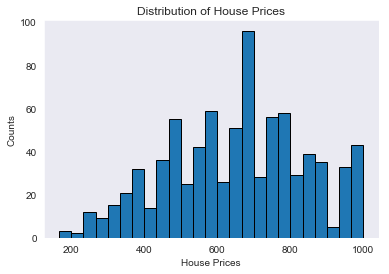

In [59]:
plt.hist(df[df['Price'] < 3000]['Price'], bins=25, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('House Prices')
plt.ylabel('Counts')
plt.show()

In [60]:
# To categorize price into cheap, medium, and expensive, I will split the data into three equal groups.
# Is this the best way to do that? Probably not, but we are building a logistic regression algo, not
# a data segmentation algo. This should suffice.
y = pd.qcut(df.Price, 3, labels=["Low", "Medium", "High"])
y.value_counts()

Low       279
High      275
Medium    270
Name: Price, dtype: int64

In [66]:
from sklearn.metrics import confusion_matrix

# Sweeeeet. That worked nicely. Next, we will create our X variable and pick n_components from a PCA analysis
X = df.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=2019)

vanilla_lr = linear_model.LogisticRegression(C=10**42) # C ~= +infinity, lambda ~= 0.000000, no regularization
vanilla_lr.fit(X_train, y_train)
vanilla_lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.28225806451612906

In [67]:
lambdas = np.arange(.00001, .005, .0005)
ridge_scores = []
for lambd in lambdas:
    ridge_lr = linear_model.LogisticRegression(penalty='l2', C=1/lambd)
    ridge_lr.fit(X_train, y_train)
#     ridge_scores.append(cross_val_score(ridge_lr, X_train, y_train, cv=5).mean())
    ridge_scores.append(ridge_lr.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [68]:
las_lambdas = np.arange(.0001, .01, .0005)
lasso_scores = []
for lambd in las_lambdas:
    lasso_lr = linear_model.LogisticRegression(penalty='l1', C=1/(lambd))
    lasso_lr.fit(X_train, y_train)
    lasso_scores.append(cross_val_score(lasso_lr, X_train, y_train, cv=5).mean())
#     lasso_scores.append(lasso_lr.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

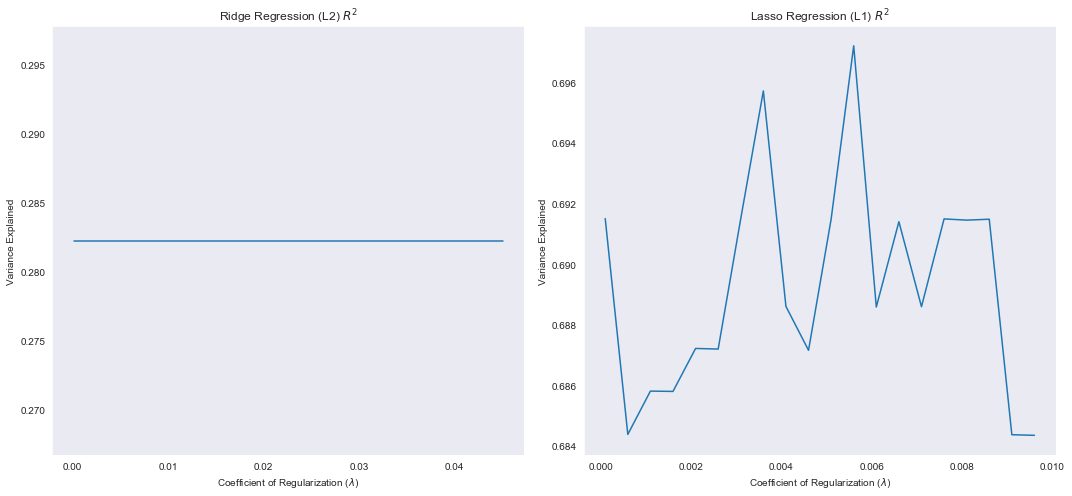

In [69]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Ridge Regression (L2) $R^2$')
plt.xlabel('Coefficient of Regularization ($\lambda$)')
plt.ylabel('Variance Explained')
plt.plot(lambdas*10, ridge_scores, label='Ridge')

plt.subplot(122)
plt.title('Lasso Regression (L1) $R^2$')
plt.xlabel('Coefficient of Regularization ($\lambda$)')
plt.ylabel('Variance Explained')
plt.plot(las_lambdas, lasso_scores, label='Lass')

plt.tight_layout()
plt.show()